# get the data

In [273]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [11]:
full_regression_data = pickle.load( open( "full_regression_data.pkl", "rb" ) )

In [395]:
featureset = pickle.load( open( "featureset.pkl", "rb" ) )

In [400]:
featureset.columns

Index([u'log_num_weeks', u'num_weeks', u'jan', u'feb', u'mar', u'apr', u'may',
       u'jun', u'jul', u'aug', u'sep', u'oct', u'nov', u'high_theatre_count',
       u'diff_gross1', u'diff_gross2', u'diff_gross3', u'diff_gross4',
       u'diff_gross5', u'diff_gross6', u'diff_gross7', u'diff_gross8',
       u'diff_gross9', u'diff_gross10', u'diff_gross11', u'diff_theaters1',
       u'diff_theaters2', u'diff_theaters3', u'diff_theaters4',
       u'diff_theaters5', u'diff_theaters6', u'diff_theaters7',
       u'diff_theaters8', u'diff_theaters9', u'diff_theaters10',
       u'diff_theaters11', u'diff_rank1', u'diff_rank2', u'diff_rank3',
       u'diff_rank4', u'diff_rank5', u'diff_rank6', u'diff_rank7',
       u'diff_rank8', u'diff_rank9', u'diff_rank10', u'diff_rank11'],
      dtype='object')

# Filter the features by number of weeks that have happened

In [402]:
def filter_features_by_week(features,weeks_happened):
    feature_subset = features[features['num_weeks']>weeks_happened]
    target_cols = [np.array(range(weeks_happened-1))+(i*11+14) for i in range(0,3)]
    original_names = np.array(features.columns[:14])
    target_names = features.columns[list(np.concatenate(target_cols))]
    target_names = np.concatenate((original_names,target_names))
    feature_subset = feature_subset[target_names].dropna()
    y = feature_subset.drop('num_weeks',axis=1).pop('log_num_weeks')
    X = feature_subset.drop(['num_weeks','log_num_weeks'],axis=1)
    return y,X

# Break data into train and test

In [403]:
y,X = filter_features_by_week(featureset,2)

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Further subest train into train and cross validation

In [406]:
training_cv_splits = []
kf = KFold(len(X_train),n_folds=4,shuffle = True)
for train_index, cv_index in kf:
    training_cv_splits.append((train_index,cv_index))

In [407]:
def grab_train_cv_data(X,y,index):
    return X.iloc[index], y.iloc[index]

In [408]:
a,b = grab_train_cv_data(X_train,y_train,training_cv_splits[3][0])

# try both ridge or lasso regression

In [409]:
def alpha_success_level(alpha,X,y):
    rgr = linear_model.Ridge(alpha = alpha)
    X_scaled = preprocessing.scale(X)
    rgr.fit(X_scaled,y)
    pred = rgr.predict(X_scaled)
    return mean_squared_error(y, pred)

In [410]:
def alpha_min_mse(X,y):
    alpha_levels = np.arange(0,20,.5)
    mse_by_alpha = np.array([])
    for level in alpha_levels:
        mse = alpha_success_level(level,X,y)
        mse_by_alpha = np.append(mse_by_alpha,mse)
    return alpha_levels[np.argmin(mse_by_alpha)]

In [416]:
rgr.score(b,a)

ValueError: shapes (1,4058) and (6,) not aligned: 4058 (dim 1) != 6 (dim 0)

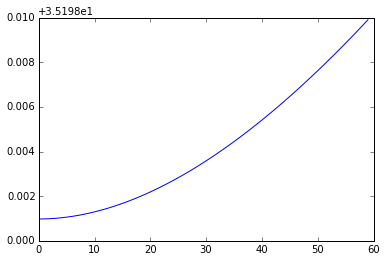

In [412]:
plt.plot(mse_by_alpha)